##Observable Trends

Upon reviewing and analyzing the data, the following three trends have been observed.

1. Compared to the 4 treatments, the mice that were given Capomulin had outperformed the other 3 treatments in all the physiological responses tested.It also exhibited slower decrease in survival rates. 

2. Compared to the placebo, the drugs Infubinol and Ketapril seemed to have a negative effect on all physiological responses tested. Capomulin exhibited slower speread of metastatic sites, where on the other hand the mice that were given the placebo had a higher survival rate than those given Infubinol, and showed slightly better results than Ketapril with respect to tumor volume and spread of metastatic sites.

3. Capomulin has shown success in decreasing the tumor volume and size. The mices that were given this drug seemed to have shown a steady decline in tumor volume. It had a total decrease average of 19% over the course of the 45 day treatment.

To conclude, the mices that were given Capomulin seemed to have shown improvement in symptoms, whereas the mices that were given a placebo were better off than those treated with Ketapril and Infubinol. 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how = "left")

# Display the data table for preview
combined_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_df1 = pd.DataFrame({"Tumor Volume (mm3)":tumor_volume_data})

# Preview DataFrame
tumor_df1

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = combined_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_df2 = pd.DataFrame({"Tumor Volume (mm3)":tumor_volume_sem})

# Preview DataFrame

tumor_df2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df1 = tumor_df1.reset_index()
tumor_volume_pivot_mean = tumor_df1.pivot(index = "Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_pivot_mean.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

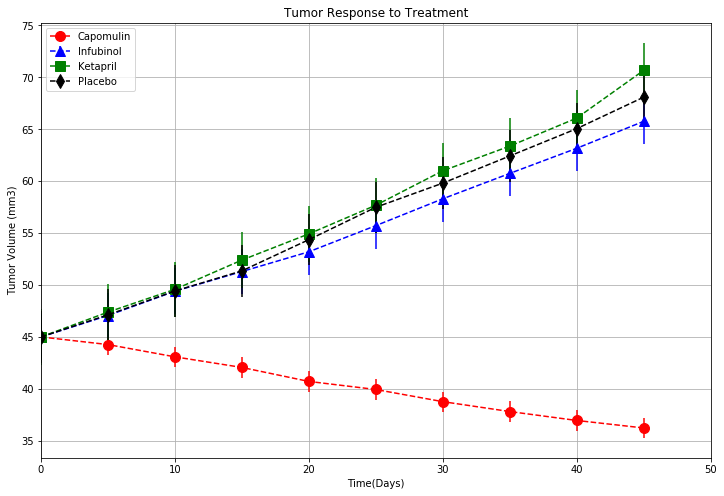

In [5]:
# Generate the Plot (with Error Bars)
Timepoint = tumor_volume_pivot_mean.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, tumor_volume_pivot_mean['Capomulin'],yerr=tumor_volume_pivot_mean['Capomulin'].sem(), marker ='o', markersize=10, linestyle='--', label="Capomulin", color='red')
plt.errorbar(Timepoint, tumor_volume_pivot_mean['Infubinol'],yerr=tumor_volume_pivot_mean['Infubinol'].sem(), marker ='^', markersize=10, linestyle='--', label="Infubinol", color='blue')
plt.errorbar(Timepoint, tumor_volume_pivot_mean['Ketapril'],yerr=tumor_volume_pivot_mean['Ketapril'].sem(), marker ='s', markersize=10, linestyle='--', label="Ketapril", color='green')
plt.errorbar(Timepoint, tumor_volume_pivot_mean['Placebo'],yerr=tumor_volume_pivot_mean['Placebo'].sem(), marker ='d', markersize=10, linestyle='--', label="Placebo", color='black')

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

#Save the Figure
plt.savefig("Fig1.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_mean = combined_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_df1 = pd.DataFrame({"Metastatic Sites":metastatic_response_mean})

# Preview DataFrame
metastatic_df1.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_sem = combined_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metastatic_df2 = pd.DataFrame({"Metastatic Sites":metastatic_response_sem})

# Preview DataFrame
metastatic_df2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

#Not sure if this is the table we need or the one below that as per the hw solution example. 

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df1 = tumor_df1.reset_index()
tumor_volume_pivot_mean = tumor_df1.pivot(index = "Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_pivot_mean.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [10]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df1 = metastatic_df1.reset_index()
metastatic_response_pivot_mean = metastatic_df1.pivot(index = "Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_response_pivot_mean.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

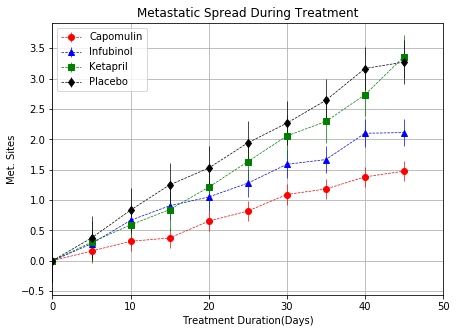

In [11]:
# Generate the Plot (with Error Bars)
Timepoint = metastatic_response_pivot_mean.index
plt.figure(figsize=(7,5))
plt.errorbar(Timepoint, metastatic_response_pivot_mean['Capomulin'],yerr=metastatic_response_pivot_mean['Capomulin'].sem(), marker ='o', markersize=6, linestyle='--', linewidth=0.7, label="Capomulin", color='red')
plt.errorbar(Timepoint, metastatic_response_pivot_mean['Infubinol'],yerr=metastatic_response_pivot_mean['Infubinol'].sem(), marker ='^', markersize=6, linestyle='--', linewidth=0.7, label="Infubinol", color='blue')
plt.errorbar(Timepoint, metastatic_response_pivot_mean['Ketapril'],yerr=metastatic_response_pivot_mean['Ketapril'].sem(), marker ='s', markersize=6, linestyle='--', linewidth=0.7, label="Ketapril", color='green')
plt.errorbar(Timepoint, metastatic_response_pivot_mean['Placebo'],yerr=metastatic_response_pivot_mean['Placebo'].sem(), marker ='d', markersize=6, linestyle='--', linewidth=0.7, label="Placebo", color='black')

plt.gca().set(xlabel = 'Treatment Duration(Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
plt.savefig("Fig2.png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data = combined_data.groupby(["Drug","Timepoint"]).nunique()["Mouse ID"]

# Convert to DataFrame
survival_rate = pd.DataFrame({"Survival Rate":survival_data})

# Preview DataFrame
survival_rate.head()

Survival Rate
Drug      Timepoint               
Capomulin 0                     25
          5                     25
          10                    25
          15                    24
          20                    23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate = survival_rate.reset_index()
survival_rate_pivot = survival_rate.pivot(index = "Timepoint", columns="Drug")["Survival Rate"]

# Preview the Data Frame
survival_rate_pivot.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                25        25        25         25  
5                24        25        24         24  
10               22        24        22         22  
15               16        24        22         21  
20               16        23        20         17

In [14]:
survival_percentage = survival_rate_pivot.copy()
survival_percentage = round(survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)

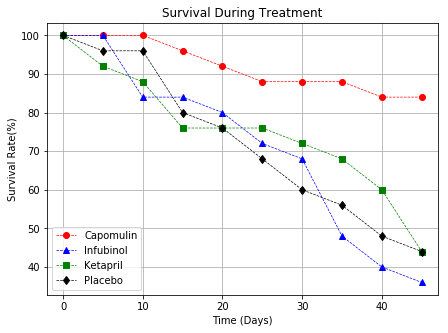

In [15]:
# Generate the Plot (Accounting for percentages)

survival_rate =  survival_percentage.index

plt.figure(figsize=(7,5))

plt.plot(survival_rate, survival_percentage['Capomulin'], marker ='o', linestyle='--', linewidth=0.7, label="Capomulin", color='red')
plt.plot(survival_rate, survival_percentage['Infubinol'], marker ='^', linestyle='--', linewidth=0.7, label="Infubinol", color='blue')
plt.plot(survival_rate, survival_percentage['Ketapril'], marker ='s', linestyle='--', linewidth=0.7, label="Ketapril", color='green')
plt.plot(survival_rate, survival_percentage['Placebo'], marker ='d', linestyle='--', linewidth=0.7, label="Placebo", color='black')
plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (-2,max(survival_rate)+2))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
percent_change = ((tumor_volume_pivot_mean.iloc[-1] - tumor_volume_pivot_mean.iloc[0] ) / tumor_volume_pivot_mean.iloc[0] ) * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [17]:
##Change the settings

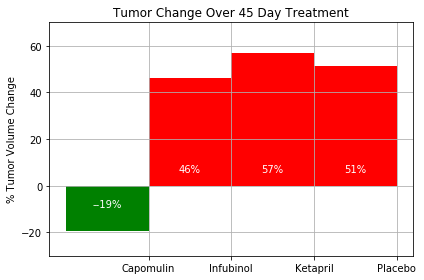

In [18]:
# Store all Relevant Percent Changes into a Tuple
tumor_percent_change = (percent_change['Capomulin'],
                        percent_change['Infubinol'],
                        percent_change['Ketapril'],
                        percent_change['Placebo'],
                        )

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(tumor_percent_change))
width = 1.0
rectsPass = ax.bar(ind[0], tumor_percent_change[0],width = -1,color='green', align='edge')
rectsFail = ax.bar(ind[1:], tumor_percent_change[1:],width= -1,color='red', align='edge')
plt.title("Tumor Change Over 45 Day Treatment")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,5,'%d%%' % int (height), ha='center',va= 'bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,-10,'-%d%%' % int (height), ha='center',va= 'bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.png")

plt.tight_layout()

# Show the Figure
plt.show()